In [606]:
import csv
import pandas
import numpy
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import StandardScaler 

In [607]:
# Reading the Spambase Data Set from UCI Machine Learning repository
df = pandas.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data',header=None)

In [609]:
#The First 57 columns of the data set will act as attributes for the KNN algorithm
#The last column is the class (spam/not spam) for the node(data entry)

attributes = df.iloc[:, 0:56].values
classes = df.iloc[:, -1].values

In [610]:
#For the purpose of development: Splitting the dataset into training and test test with ratio of 0.33

attributes_train, attributes_test, classes_train, classes_test = train_test_split(attributes, classes, test_size=0.33, random_state=1)

In [611]:
#For the purpose of development: scaling the dataset attributes

scaler = StandardScaler()  
scaler.fit(attributes_train)

attributes_train = scaler.transform(attributes_train)  
attributes_test = scaler.transform(attributes_test)

In [613]:
# Implementation of K-nearest neighbour algorithm inside a method called predict
# Methodname: predict 
# Inputs: takes the training set attributes, test set attributes and training set classes and the value of k
# Returns: The class that is associated with the most number of neighbouring nodes 

def predict(attributes_train,attributes_test_item,classes_train,k):
    
    distances=[]
    neighbours_classes=[]
    
    
    #Calculating the euclidian distances between the test node and training nodes
    for i in range(len(attributes_train)):
        distance=numpy.sqrt(numpy.sum(numpy.square(attributes_test_item-attributes_train[i,:])))
        
        distances.append([distance,i])
    
    #Sorting the distances so as to later calculate the closest k neighbours
    distances=sorted(distances)
    
    #Fetching the classes of closest k neighbours
    for i in range(k):
        index=distances[i][1] #fetching the index of the neighbour selected as a target
        neighbours_classes.append(classes_train[index]) #the class of that neighbour
    
    #Fetching the most common class among the k neighbours
    predicted_class= Counter(neighbours_classes).most_common(1)[0][0]
    
    return predicted_class

In [601]:
# Predicting the classes of the nodes in test set
# Predicted classes are stored in predictions array

predictions=[]

for i in range(len(attributes_test)):
    predictions.append(predict(attributes_train,attributes_test[i,:],classes_train,1))
    

In [602]:
# Evaluation of the accuracy of predictions against test set classes
print(accuracy_score(classes_test, predictions))

0.9144173798551679


In [638]:
# Report generation

from sklearn.metrics import classification_report, confusion_matrix 
print("################")
print("Confusion Matrix")

print(confusion_matrix(classes_test, predictions))  

print("################")
print("\nClassification report")
print(classification_report(classes_test, predictions))  

################
Confusion Matrix
[[854  52]
 [ 78 535]]
################

Classification report
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       906
           1       0.91      0.87      0.89       613

   micro avg       0.91      0.91      0.91      1519
   macro avg       0.91      0.91      0.91      1519
weighted avg       0.91      0.91      0.91      1519



In [629]:
# Finding the best possible value of k in the range 1 to 100
# The K value which will cause the best accuracy rate will be selected

accuracy = []

# Calculating accuracies for K values between 1 and 100
for i in range(1,100):  
    pred_i=[]
    for j in range(len(attributes_test)):
        pred_i.append(predict(attributes_train,attributes_test[j,:],classes_train,i))
    
#     print(len(pred_i))

    accuracy.append(accuracy_score(classes_test, pred_i))


Text(0, 0.5, 'accuracy')

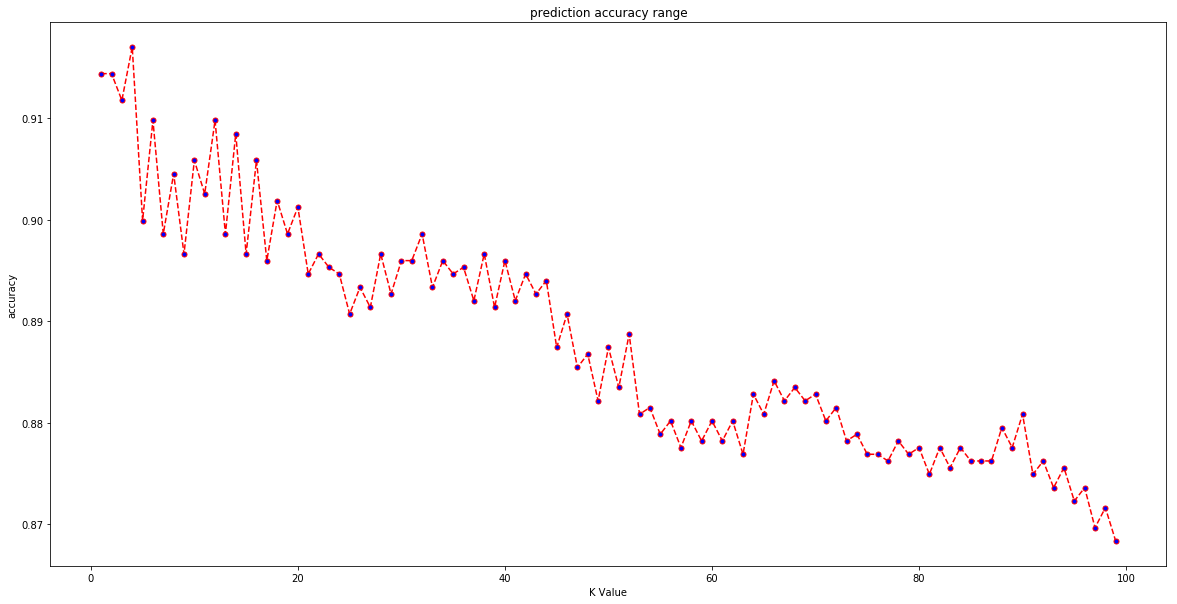

In [631]:
# Plotting the line graph to see the trend of accuracy score for k values ranging from 1 to 100 using the accuracies calculated

plt.figure(figsize=(20, 10))  
plt.plot(range(1, 100), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=5)
plt.title('prediction accuracy range')  
plt.xlabel('K Value')  
# plt.ylabel('Mean Error')
plt.ylabel('accuracy')  

In [634]:
# Validation of the implementation 
# Method: k-fold cross-validation

# For K fold validation, the K value is 5
# The number of repeats is set to 1 to get clear idea of accuracy when nodes are exclusively in different folds
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=1, random_state=3)

false_positives=[]
false_negatives=[]
error_rates=[]

#For each fold
for train_index, test_index in rkf.split(attributes):
    attributes_train2, attributes_test2, classes_train2, classes_test2 = attributes[train_index], attributes[test_index], classes[train_index], classes[test_index]
    
    #scaling the attibutes
    scaler = StandardScaler()  
    scaler.fit(attributes_train2)
    attributes_train = scaler.transform(attributes_train2)  
    attributes_test = scaler.transform(attributes_test2)
    
    predictions2=[]
    
    #predictions of classes using KNN
    for i in range(len(attributes_test)):
        predictions2.append(predict(attributes_train2,attributes_test2[i,:],classes_train2,4))
    
    #Printing the accuracy score, False postives and negatives and error rates for each fold
    print("##Fold report##")
    print("Accuracy Score:",accuracy_score(classes_test2, predictions2))
#   print(confusion_matrix(classes_test2, predictions2))
    confusionMatrix=confusion_matrix(classes_test2, predictions2)
    print("false positives:",confusionMatrix[0][1])
    print("false negatives:",confusionMatrix[1][0])
    print("error rate     :",(confusionMatrix[0][1]+confusionMatrix[1][0])/len(attributes_test2))
    false_positives.append(confusionMatrix[0][1])
    false_negatives.append(confusionMatrix[1][0])
    error_rates.append((confusionMatrix[0][1]+confusionMatrix[1][0])/len(attributes_test2))
    print("\n")
    

    


##Fold report##
Accuracy Score: 0.9131378935939196
false positives: 31
false negatives: 49
error rate     : 0.08686210640608034


##Fold report##
Accuracy Score: 0.8989130434782608
false positives: 48
false negatives: 45
error rate     : 0.10108695652173913


##Fold report##
Accuracy Score: 0.9021739130434783
false positives: 43
false negatives: 47
error rate     : 0.09782608695652174


##Fold report##
Accuracy Score: 0.925
false positives: 32
false negatives: 37
error rate     : 0.075


##Fold report##
Accuracy Score: 0.9065217391304348
false positives: 43
false negatives: 43
error rate     : 0.09347826086956522




In [635]:
# Evaluation of results

data=[]

data.append(false_positives)
data.append(false_negatives)
data.append(error_rates)

report = pandas.DataFrame(data=data,index=['false positives','false negatives','error rate'],columns=['Fold1','Fold2','Fold3','Fold4','Fold5'])

print(report)



                     Fold1      Fold2      Fold3   Fold4      Fold5
false positives  31.000000  48.000000  43.000000  32.000  43.000000
false negatives  49.000000  45.000000  47.000000  37.000  43.000000
error rate        0.086862   0.101087   0.097826   0.075   0.093478
